In [1]:
"""
Author: Omid Ahmadzadeh
GitHub: https://github.com/Omid4mit
Email: omid4mit@gmail.com
Date Created: 2025-09-14
Last Modified: 2025-09-22
Description:
    This script performs data loading, cleaning, and exploratory analysis
    and predict the future sales of different items at various stores based on 
    their historical sales data:
    - Dataset : "Store Item Demand Forecasting Challenge" on Kaggle
    - Step1: Data Cleaning and Preparation
    - Step2: Time Series EDA & Visualization
    - Step3: Feature Engineering from Time

"""

'\nAuthor: Omid Ahmadzadeh\nGitHub: https://github.com/Omid4mit\nEmail: omid4mit@gmail.com\nDate Created: 2025-09-14\nLast Modified: 2025-09-22\nDescription:\n    This script performs data loading, cleaning, and exploratory analysis\n    and predict the future sales of different items at various stores based on \n    their historical sales data:\n    - Dataset : "Store Item Demand Forecasting Challenge" on Kaggle\n    - Step1: Data Cleaning and Preparation\n    - Step2: Time Series EDA & Visualization\n    - Step3: Feature Engineering from Time\n\n'

In [62]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [3]:
# 1. Data Cleaning and Preparation

In [4]:
# 1.1 Load Data
loadCSV = pd.read_csv('train.csv')
trainData = pd.DataFrame(loadCSV)
trainData.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
# 1.2 Check DataFrame Data Types
trainData.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [6]:
# 1.3 Convert Data Types
trainData['date'] = pd.to_datetime(trainData['date'])

In [7]:
# 1.4 Set Data as Index
# trainData.set_index('date', inplace= True)

In [8]:
# 2. Time Series Exploratory Data Analysis (EDA) and Visualization

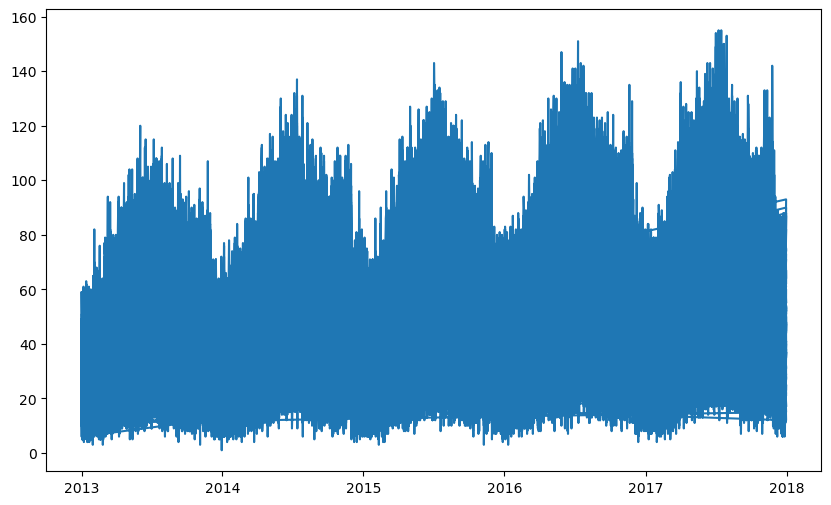

In [9]:
# 2.1 Plot Sales over Date for Store 1
trainDataStore1 = trainData[trainData['store'] == 1 ]
fig1 = plt.figure(figsize= (10, 6))
plt.plot(trainDataStore1['date'], trainDataStore1['sales'])

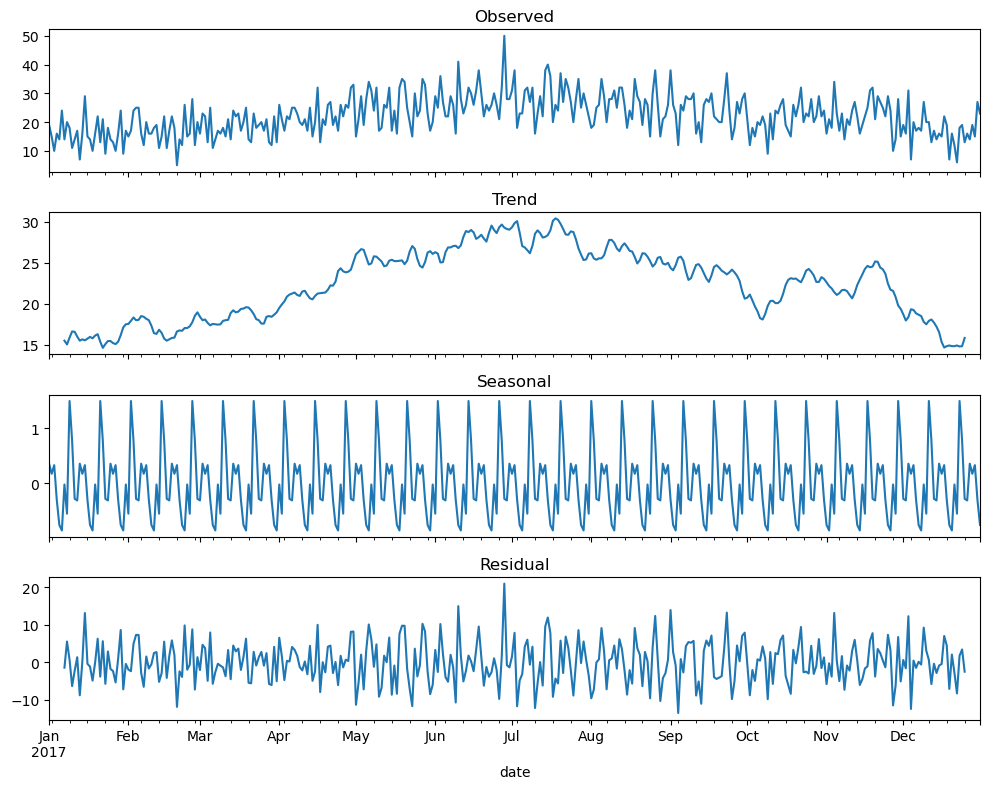

In [10]:
# 2.1 Plot Sales over Date for Store 1
# Filter Store 1, Item 1 and year 2017
trainDataStore1_2017 = trainData[(trainData['store'] == 1) & 
                                 (trainData['item'] == 1) &
                                 (trainData['date'] >= '2017-01-01') & 
                                 (trainData['date'] <= '2017-12-31')]

# Set date as index
ts = trainDataStore1_2017.set_index('date')['sales']

# Using Statsmodels to decompose time series into: trend, seasonal and residual components
decomposition = seasonal_decompose(ts, model='additive', period=12)
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()

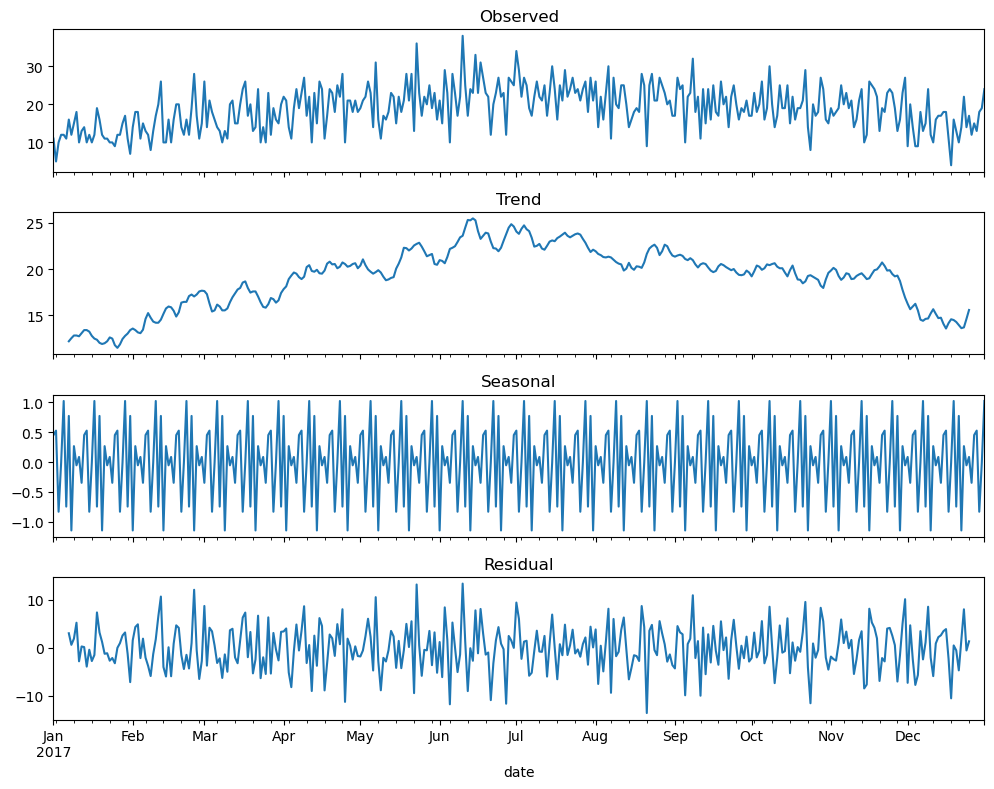

In [11]:
# 2.2 Plot Sales over Date for Store 5
# Filter Store 5, Item 1 and year 2017
trainDataStore5_2017 = trainData[(trainData['store'] == 5) & 
                                 (trainData['item'] == 1) &
                                 (trainData['date'] >= '2017-01-01') & 
                                 (trainData['date'] <= '2017-12-31')]

# Set date as index
ts = trainDataStore5_2017.set_index('date')['sales']

# Using Statsmodels to decompose time series into: trend, seasonal and residual components
decomposition = seasonal_decompose(ts, model='additive', period=12)
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()

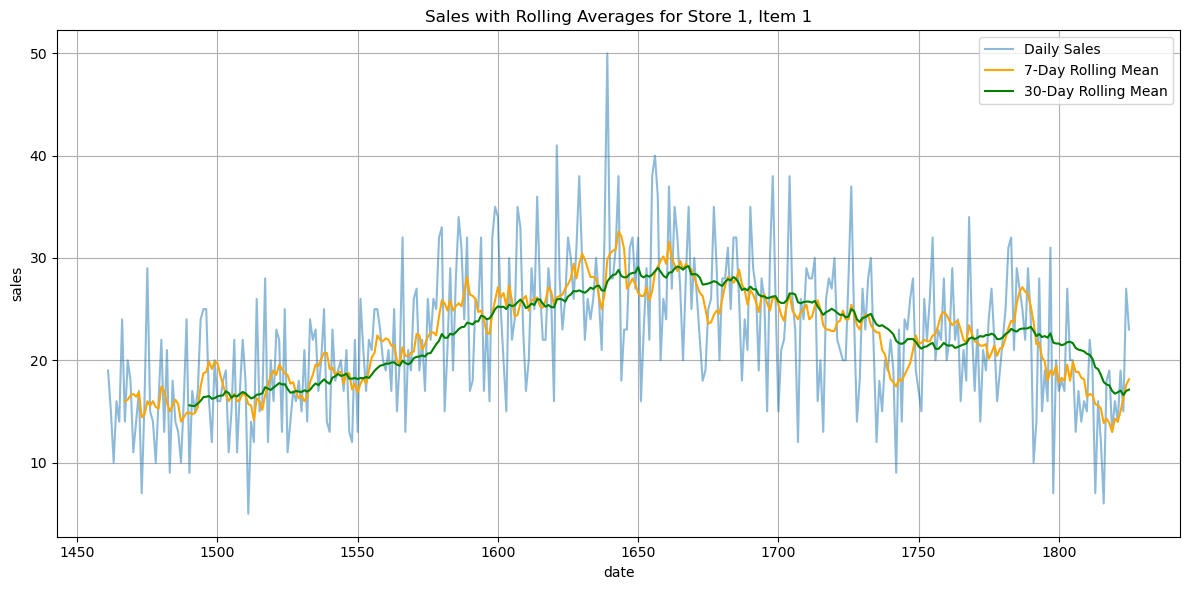

In [12]:
# 2.3 Calculate rolling means for Store 1, Item 1
# Calculate rolling means
trainDataStore1_2017 = trainDataStore1_2017.copy()
trainDataStore1_2017['7_day_avg'] = trainDataStore1_2017['sales'].rolling(window=7).mean()
trainDataStore1_2017['30_day_avg'] = trainDataStore1_2017['sales'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(trainDataStore1_2017['sales'], label='Daily Sales', alpha=0.5)
plt.plot(trainDataStore1_2017['7_day_avg'], label='7-Day Rolling Mean', color='orange')
plt.plot(trainDataStore1_2017['30_day_avg'], label='30-Day Rolling Mean', color='green')
plt.title('Sales with Rolling Averages for Store 1, Item 1')
plt.xlabel('date')
plt.ylabel('sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

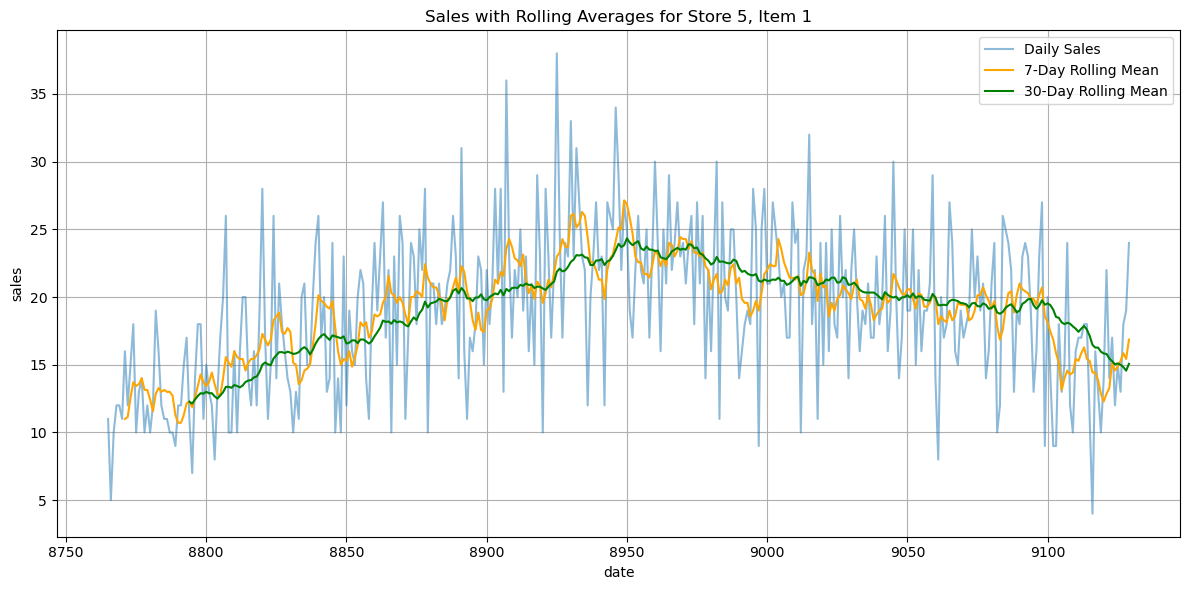

In [13]:
# 2.4 Calculate rolling means for Store 5, Item 1
# Calculate rolling means
trainDataStore5_2017 = trainDataStore5_2017.copy()
trainDataStore5_2017['7_day_avg'] = trainDataStore5_2017['sales'].rolling(window=7).mean()
trainDataStore5_2017['30_day_avg'] = trainDataStore5_2017['sales'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(trainDataStore5_2017['sales'], label='Daily Sales', alpha=0.5)
plt.plot(trainDataStore5_2017['7_day_avg'], label='7-Day Rolling Mean', color='orange')
plt.plot(trainDataStore5_2017['30_day_avg'], label='30-Day Rolling Mean', color='green')
plt.title('Sales with Rolling Averages for Store 5, Item 1')
plt.xlabel('date')
plt.ylabel('sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# 3. Feature Engineering from Time

In [15]:
# 3.1 Create Time-Based Features

trainData['day_of_week'] = trainData['date'].dt.dayofweek       # 0 = Monday, 6 = Sunday
trainData['month'] = trainData['date'].dt.month                 # 1 to 12
trainData['year'] = trainData['date'].dt.year                   # e.g., 2025
trainData['quarter'] = trainData['date'].dt.quarter             # 1 to 4
trainData['day_of_year'] = trainData['date'].dt.dayofyear       # 1 to 365/366
trainData.head()

,date,store,item,sales,day_of_week,month,year,quarter,day_of_year
0,2013-01-01,1,1,13,1,1,2013,1,1
1,2013-01-02,1,1,11,2,1,2013,1,2
2,2013-01-03,1,1,14,3,1,2013,1,3
3,2013-01-04,1,1,13,4,1,2013,1,4
4,2013-01-05,1,1,10,5,1,2013,1,5


In [16]:
# 3.2 Create Lag Features
trainData['sales_lag_1'] = trainData['sales'].shift(1)     # Previous day
trainData['sales_lag_7'] = trainData['sales'].shift(7)     # Same day last week
trainData.head()

,date,store,item,sales,day_of_week,month,year,quarter,day_of_year,sales_lag_1,sales_lag_7
0,2013-01-01,1,1,13,1,1,2013,1,1,NaN,NaN
1,2013-01-02,1,1,11,2,1,2013,1,2,13.0,NaN
2,2013-01-03,1,1,14,3,1,2013,1,3,11.0,NaN
3,2013-01-04,1,1,13,4,1,2013,1,4,14.0,NaN
4,2013-01-05,1,1,10,5,1,2013,1,5,13.0,NaN


In [17]:
# 3.2.1 Handle Missing Values (Backward Fill)
trainData.bfill(inplace=True)
trainData.head()

,date,store,item,sales,day_of_week,month,year,quarter,day_of_year,sales_lag_1,sales_lag_7
0,2013-01-01,1,1,13,1,1,2013,1,1,13.0,13.0
1,2013-01-02,1,1,11,2,1,2013,1,2,13.0,13.0
2,2013-01-03,1,1,14,3,1,2013,1,3,11.0,13.0
3,2013-01-04,1,1,13,4,1,2013,1,4,14.0,13.0
4,2013-01-05,1,1,10,5,1,2013,1,5,13.0,13.0


In [32]:
# 3.2.2 Create rolling window features
trainData['sales_7d_avg'] = trainData['sales'].rolling(window = 7).mean()
trainData['sales_30d_max'] = trainData['sales'].rolling(window = 30).max()
trainData['sales_14d_std'] = trainData['sales'].rolling(window = 14).std()
trainData.head()

,date,store,item,sales,day_of_week,month,year,quarter,day_of_year,sales_lag_1,sales_lag_7,sales_7d_avg,sales_30d_max,sales_14d_std
0,2013-01-01,1,1,13,1,1,2013,1,1,13.0,13.0,NaN,NaN,NaN
1,2013-01-02,1,1,11,2,1,2013,1,2,13.0,13.0,NaN,NaN,NaN
2,2013-01-03,1,1,14,3,1,2013,1,3,11.0,13.0,NaN,NaN,NaN
3,2013-01-04,1,1,13,4,1,2013,1,4,14.0,13.0,NaN,NaN,NaN
4,2013-01-05,1,1,10,5,1,2013,1,5,13.0,13.0,NaN,NaN,NaN


In [34]:
# 3.2.3 Fill Null Values
trainData['sales_7d_avg'] = trainData['sales_7d_avg'].fillna(trainData['sales_7d_avg'].median())
trainData['sales_30d_max'] = trainData['sales_30d_max'].fillna(trainData['sales_30d_max'].median())
trainData['sales_14d_std'] = trainData['sales_14d_std'].fillna(trainData['sales_14d_std'].median())
trainData.head()

,date,store,item,sales,day_of_week,month,year,quarter,day_of_year,sales_lag_1,sales_lag_7,sales_7d_avg,sales_30d_max,sales_14d_std
0,2013-01-01,1,1,13,1,1,2013,1,1,13.0,13.0,47.714286,68.0,9.154654
1,2013-01-02,1,1,11,2,1,2013,1,2,13.0,13.0,47.714286,68.0,9.154654
2,2013-01-03,1,1,14,3,1,2013,1,3,11.0,13.0,47.714286,68.0,9.154654
3,2013-01-04,1,1,13,4,1,2013,1,4,14.0,13.0,47.714286,68.0,9.154654
4,2013-01-05,1,1,10,5,1,2013,1,5,13.0,13.0,47.714286,68.0,9.154654


In [19]:
# 4. Model Building and Training

In [35]:
# 4.1 Create X, y
X = trainData.drop(columns= ['sales', 'date'], axis = 1)
y = trainData['sales']

In [52]:
# 4.2 Choose and Train Model (Linear Regression)
linearRegModel = LinearRegression()
linearRegModel.fit(X, y)

LinearRegression()

In [56]:
# 4.3 Choose and Train Model (Gradinet Boosting Regression)
gradientBoostModel = GradientBoostingRegressor(
    n_estimators=100,     # Fewer boosting rounds
    max_depth=3,          # Shallow trees
    learning_rate=0.1,    # Standard step size
    subsample=0.8,        # Use 80% of data per tree
    random_state=42
)
gradientBoostModel.fit(X, y)

GradientBoostingRegressor(random_state=42, subsample=0.8)

In [63]:
# 4.4 Choose and Train Model (Random Forest Regression)
randomForRegModel = RandomForestRegressor(
    n_estimators=100,     # Number of trees (start small for speed)
    max_depth=10,         # Limit tree depth to prevent overfitting
    max_features='sqrt',  # Use a subset of features per split
    n_jobs=-1,            # Use all CPU cores for parallel training
    random_state=42
)
randomForRegModel.fit(X, y)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_jobs=-1,
                      random_state=42)

In [64]:
# 4.5 Choose and Train Model (XGBoost)
XGBRegModel = XGBRegressor()
XGBRegModel.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)